In [22]:
import sys
import os
import numpy as np
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import itertools
sys.path.append(os.path.abspath(os.path.join('..')))
from utils.sanity_checks import *
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]

from co_occurence import *

# Check Python Version
import sys
import os

assert sys.version_info[0] == 3
assert sys.version_info[1] >= 5

sys.path.append(os.path.abspath(os.path.join('..')))

from utils.utils import *


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/lycanluo/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [2]:
def distinctWords(corpus):
    corpus_words = []
    num_corpus_words = -1
    ### SOLUTION BEGIN
    corpus_words=sorted(list(set(itertools.chain.from_iterable(corpus))))
    num_corpus_words = len(corpus_words)
    ### SOLUTION END
    return corpus_words, num_corpus_words

In [48]:
def computeCoOccurrenceMatrix(corpus, window_size=4):
    words, num_words = distinctWords(corpus)
    M = None
    word2Ind = {}
    ### SOLUTION BEGIN 
    M=np.zeros((num_words,num_words))
    word2Ind={x:i for i,x in enumerate(words)}
    for sent in corpus:
        for word_index,word in enumerate(words):
            if word in sent:
                indices=[i for i,x in enumerate(sent) if x==word]
                for index in indices:
                    subsent=[sent[i] for i in range(max(0,index-window_size),min(index+window_size+1,len(sent))) if i!=index]
                    M[word_index,:]=M[word_index,:]+[subsent.count(i) for i in words]               
    ### SOLUTION END
    return M, word2Ind

In [20]:
def reduceToKDim(M, k=2):
    np.random.seed(4355)
    n_iters = 10  # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    ### SOLUTION BEGIN
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced=svd.fit_transform(M)
    ### SOLUTION END
    print("Done.")
    return M_reduced

In [23]:
def plot_embeddings(M_reduced, word2Ind, words, title):
    for word in words:
        idx = word2Ind[word]
        x = M_reduced[idx, 0]
        y = M_reduced[idx, 1]
        plt.scatter(x, y, marker='x', color='red')
        plt.text(x, y, word, fontsize=9)
    plt.savefig(title)

In [24]:
# Read in the corpus
reuters_corpus = readCorpus()

Running Truncated SVD over 8185 words...
Done.


In [49]:
M_co_occurrence, word2Ind_co_occurrence = computeCoOccurrenceMatrix(reuters_corpus)
M_reduced_co_occurrence = reduceToKDim(M_co_occurrence, k=2)
# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis]  # broadcasting
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'venezuela']

Running Truncated SVD over 8185 words...
Done.


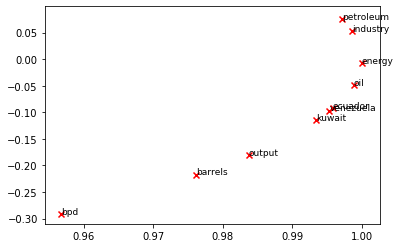

In [50]:
plot_embeddings(M_normalized, word2Ind_co_occurrence, words, 'co_occurence_embeddings.png')

In [45]:
word2Ind_co_occurrence[1252]

'barrels'

In [46]:
word2Ind_co_occurrence['barrels']

KeyError: 'barrels'

In [54]:
pprint.pprint(words)

NameError: name 'pprint' is not defined

In [33]:
word2Ind_co_occurrence

False

In [19]:

for word in words:
    idx = word2Ind[word]
    x = M_reduced[idx, 0]
    y = M_reduced[idx, 1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, word, fontsize=9)

array([[0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 2.],
       [1., 0., 0., 0., 0., 0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 1., 0., 1., 0., 2.],
       [0., 1., 1., 1., 2., 0., 0., 0., 2., 0.]])

In [21]:
test_reduceToKDim()

NameError: name 'test_reduceToKDim' is not defined

In [55]:
import torch

In [56]:
a=torch.tensor(list(range(9)))

In [57]:
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [58]:
b=a.view(3,3)

In [62]:
b[1,1]

tensor(4)

In [60]:
c=b[1:,1:]

In [66]:
c

tensor([[4, 5],
        [7, 8]])

In [65]:
c.stride()

(3, 1)

In [69]:
c.storage_offset()

4

In [70]:
c.size()

torch.Size([2, 2])

In [71]:
v = torch.arange(9)
v = v.view(3, 3)

In [72]:
v

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [73]:
r = torch.stack((v, v))

In [74]:
r

tensor([[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]],

        [[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]])

In [82]:
r = torch.gather(v, 1, torch.LongTensor([[0,1],[1,0],[2,1]]))

In [88]:
torch.sin(v.float())

tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589],
        [-0.2794,  0.6570,  0.9894]])

In [77]:
r = torch.chunk(v, 3)

In [78]:
r

(tensor([[0, 1, 2]]), tensor([[3, 4, 5]]), tensor([[6, 7, 8]]))

In [79]:
t = torch.ones(2,1,2,1) # Size 2x1x2x1
r = torch.squeeze(t)     # Size 2x2
r = torch.squeeze(t, 1)

In [80]:
r

tensor([[[1.],
         [1.]],

        [[1.],
         [1.]]])

In [81]:
t

tensor([[[[1.],
          [1.]]],


        [[[1.],
          [1.]]]])